In [1]:
import jax
import juniper as jp

from juniper.steps.NeuralField import NeuralField
from juniper.steps.StaticGain import StaticGain
from juniper.steps.DemoInput import DemoInput
from juniper.steps.Sum import Sum
from juniper.steps.ComponentMultiply import ComponentMultiply
from juniper.steps.GaussInput import GaussInput
from juniper.steps.Normalization import Normalization
from juniper.steps.TransferFunction import TransferFunction
from juniper.steps.TimedBoost import TimedBoost
from juniper.steps.Projection import Projection
from juniper.steps.HebbianConnection import HebbianConnection
from juniper.steps.CompressAxes import CompressAxes
from juniper.steps.ExpandAxes import ExpandAxes
from juniper.steps.ReorderAxes import ReorderAxes
from juniper.steps.HebbianConnection import HebbianConnection

In [2]:
print("Computing devices found by JAX:")
print(jax.local_devices())

Computing devices found by JAX:
[CpuDevice(id=0)]


In [3]:
arch = jp.Architecture.get_arch()

In [4]:
"""jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

# Static steps
demo_input = DemoInput("in0")
st0 = StaticGain("st0")
sum0 = Sum("sum0")
mult0 = ComponentMultiply("mult0")
gauss0 = GaussInput("gauss0")
norm0 = Normalization("norm0")
trans0 = TransferFunction("trans0")
t_boost = TimedBoost("t_boost")
proj0 = Projection("proj0")
compr0 = CompressAxes("compr0")
exp0 = ExpandAxes("exp0")
reord0 = ReorderAxes("reord0")

# Dynamic steps
nf1 = NeuralField("Action Field")
nf0 = NeuralField("Attention Field")
heb0 = HebbianConnection("heb0")

# connections
demo_input >> nf0
nf0 >> st0
st0 >> nf1

nf0 >> sum0
nf1 >> sum0

sum0 >> mult0
nf1 >> mult0 >> nf1
gauss0 >> nf0

sum0 >> norm0 >> trans0
t_boost >> nf0

nf0 >> proj0 >> nf1

t_boost >> "heb0.in0"
nf1 >> "heb0.in1"

nf0 >> compr0 >> exp0 >> reord0 >> nf1

arch.compile()"""

'jp.Architecture.delete_arch()\narch = jp.Architecture.get_arch()\n\n# Static steps\ndemo_input = DemoInput("in0")\nst0 = StaticGain("st0")\nsum0 = Sum("sum0")\nmult0 = ComponentMultiply("mult0")\ngauss0 = GaussInput("gauss0")\nnorm0 = Normalization("norm0")\ntrans0 = TransferFunction("trans0")\nt_boost = TimedBoost("t_boost")\nproj0 = Projection("proj0")\ncompr0 = CompressAxes("compr0")\nexp0 = ExpandAxes("exp0")\nreord0 = ReorderAxes("reord0")\n\n# Dynamic steps\nnf1 = NeuralField("Action Field")\nnf0 = NeuralField("Attention Field")\nheb0 = HebbianConnection("heb0")\n\n# connections\ndemo_input >> nf0\nnf0 >> st0\nst0 >> nf1\n\nnf0 >> sum0\nnf1 >> sum0\n\nsum0 >> mult0\nnf1 >> mult0 >> nf1\ngauss0 >> nf0\n\nsum0 >> norm0 >> trans0\nt_boost >> nf0\n\nnf0 >> proj0 >> nf1\n\nt_boost >> "heb0.in0"\nnf1 >> "heb0.in1"\n\nnf0 >> compr0 >> exp0 >> reord0 >> nf1\n\narch.compile()'

In [5]:
"""plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, "", 100)"""

'plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, "", 100)'

In [6]:

from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()


neural_field_params1 = {
        "shape": [50,50],
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "AbsSigmoid",
            "beta": 10,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {
                "excitatory":
                {
                "sigma": [3,3],
                "amplitude": 0.3,
                "normalized": False,
                "max_shape": [21,21],
                "factorized": True
                }
            }
        }
    }
neural_field_params2 = {
        "shape": [50,50],
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "HeavySideSigmoid",
            "beta": 10,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {
                "excitatory":
                {
                "sigma": [1,1],
                "amplitude": 0.3,
                "normalized": False,
                "max_shape": [21,21],
                "factorized": False
                }
            }
        }
    }

gauss_params =     {
        "shape": [50,50],
        "amplitude": 5.5,
        "sigma": [2,2],
        "center": [25,25],
        "factorized": False,
        "normalized": False
    }

nf1 = NeuralField("nf1", params=neural_field_params1)
pprint(vars(nf1))
nf2 = NeuralField("nf2", params=neural_field_params2)
gauss0 = GaussInput("gauss0", params=gauss_params)

gauss0 >> nf1
gauss0 >> nf2

arch.compile()

{'_delta_t': 0.02,
 '_lateral_kernel': <juniper.LateralKernel.LateralKernel object at 0x00000188DDFDD550>,
 '_max_incoming_connections': {'in0': inf},
 '_name': 'nf1',
 '_params': {'LateralKernel': {'gaussians': {'excitatory': {'amplitude': 0.3,
                                                            'factorized': True,
                                                            'max_shape': [21,
                                                                          21],
                                                            'normalized': False,
                                                            'sigma': [3, 3]}}},
             'global_inhibition': -0.01,
             'input_noise_gain': 0.1,
             'resting_level': -5,
             'shape': [50, 50],
             'sigmoid': {'beta': 10, 'threshold': 0, 'type': 'AbsSigmoid'},
             'tau': 0.1},
 'buffer': {'activation': Array([[-5., -5., -5., ..., -5., -5., -5.],
       [-5., -5., -5., ..., -5., -5., -

  2.30 ms / time step
  0.07 s total duration

  0.03 ms average time for computation of static steps
  2.21 ms average time for dynamic computation
Saving buffers... done


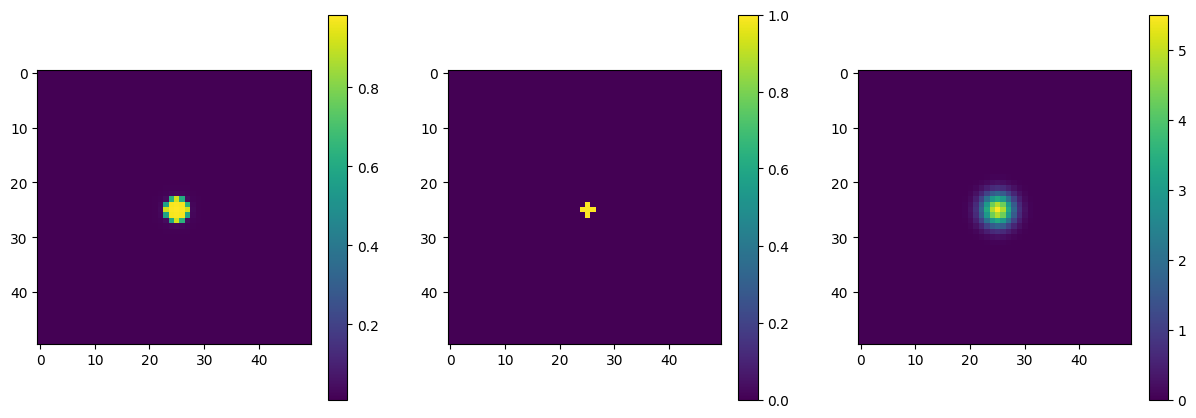

In [7]:
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, ["nf1", "nf2", "gauss0"], 30)


import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
im1=axes[0].imshow(plot_data_history[-1][0])
im2=axes[1].imshow(plot_data_history[-1][1])
im3=axes[2].imshow(plot_data_history[-1][2])
fig.colorbar(im1, ax=axes[0])
fig.colorbar(im2, ax=axes[1])
fig.colorbar(im3, ax=axes[2])
plt.show()

In [8]:
import time
from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

shape = [100,100,100]
neural_field_params1 = {
        "shape": shape,
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "AbsSigmoid",
            "beta": 100,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {
                "excitatory":
                {
                "sigma": [3,3,3],
                "amplitude": 1.0,
                "normalized": False,
                "max_shape": [100,100,100],
                "factorized": True,
                "shape": [100,100,100]
                }
            }
        }
    }
neural_field_params2 = {
        "shape": shape,
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "AbsSigmoid",
            "beta": 100,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {
                "excitatory":
                {
                "sigma": [3,3,3],
                "amplitude": 1.0,
                "normalized": False,
                "max_shape": [100,100,100],
                "factorized": False,
                "shape": [100,100,100]
                }
            }
        }
    }

gauss_params =     {
        "shape": shape,
        "amplitude": 5.0,
        "sigma": [1,1,1],
        "center": [25,25,25],
        "factorized": False,
        "normalized": False
    }

nf1 = NeuralField("nf1", params=neural_field_params1)
gauss0 = GaussInput("gauss0", params=gauss_params)

gauss0 >> nf1

arch.compile()
t0 = time.time()
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, [], 100)
t1 = time.time()
print("time: ", t1-t0)


Static step compilation graph:
gauss0   <-- []

Loading saved buffers...
 80.48 ms / time step
  8.05 s total duration

  1.79 ms average time for computation of static steps
 78.55 ms average time for dynamic computation
Saving buffers... done
time:  8.0508131980896


In [9]:
import time
from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()


nf1 = NeuralField("nf1", params=neural_field_params2)
gauss0 = GaussInput("gauss0", params=gauss_params)

gauss0 >> nf1

arch.compile()
t0 = time.time()
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, [], 100)
t1 = time.time()
print("time: ", t1-t0)


Static step compilation graph:
gauss0   <-- []

Loading saved buffers...
319.48 ms / time step
 31.95 s total duration

  2.17 ms average time for computation of static steps
317.15 ms average time for dynamic computation
Saving buffers... done
time:  31.959752321243286


In [10]:
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

import time
from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

shape = [100,100]
neural_field_params1 = {
        "shape": shape,
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "AbsSigmoid",
            "beta": 100,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {}
        }
    }
neural_field_params2 = {
        "shape": [1,],
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "HeavySideSigmoid",
            "beta": 100,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {}
        }
    }
neural_field_params3 = {
        "shape": [10,],
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "HeavySideSigmoid",
            "beta": 100,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {}
        }
    }

neural_field_params4 = {
        "shape": [50,50],
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": {
            "type": "AbsSigmoid",
            "beta": 100,
            "threshold": 0
        },
        "LateralKernel": {
            "gaussians": {}
        }
    }

gauss_params =     {
        "shape": [1,],
        "amplitude": 5.0,
        "sigma": [0.1,],
        "center": [0,],
        "factorized": False,
        "normalized": False
    }
gauss_params3 =     {
        "shape": [10,],
        "amplitude": 5.0,
        "sigma": [0.1,],
        "center": [0,],
        "factorized": False,
        "normalized": False
    }

gauss_params2 =     {
        "shape": shape,
        "amplitude": 5.0,
        "sigma": [3,3],
        "center": [30,30],
        "factorized": False,
        "normalized": False
    }
gauss_params4 =     {
        "shape": [50,50],
        "amplitude": 5.0,
        "sigma": [3,3],
        "center": [30,30],
        "factorized": False,
        "normalized": False
    }

hebbian_params = {"shape": [1,], "target_shape": shape, "tau": 0.01, "tau_decay": 0.1, "learning_rate": 0.00005,
                        "learning_rule": "instar", "bidirectional": True, "reward_type": "no_reward", "reward_duration": [0,1]}
hebbian_params2 = {"shape": [10,], "target_shape": [50,50], "tau": 0.01, "tau_decay": 0.1, "learning_rate": 0.02,
                        "learning_rule": "instar", "bidirectional": True, "reward_type": "no_reward", "reward_duration": [0,1]}

nf1 = NeuralField("nf1", params=neural_field_params1)
nf2 = NeuralField("nf2", params=neural_field_params4)
nd1 = NeuralField("nd1", params=neural_field_params2)
nd2 = NeuralField("nd2", params=neural_field_params3)
heb0 = HebbianConnection("heb0", params=hebbian_params)
heb1 = HebbianConnection("heb1", params=hebbian_params2)
gauss0 = GaussInput("gauss0", params=gauss_params)
gauss1 = GaussInput("gauss1", params=gauss_params2)
gauss3 = GaussInput("gauss3", params=gauss_params3)
gauss4 = GaussInput("gauss4", params=gauss_params4)

gauss0 >> nd1
gauss3 >> nd2
gauss1 >> nf1
gauss4 >> nf2

nd1 >> "heb0.in0" >> nf1 >> "heb0.in1"
gauss0 >> "heb0.in2"

nd2 >> "heb1.in0" >> nf2 >> "heb1.in1"
gauss0 >> "heb1.in2"

arch.compile()
t0 = time.time()
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, [], 100)
t1 = time.time()
print("time: ", t1-t0)


Static step compilation graph:
gauss1   <-- []
gauss4   <-- []
gauss0   <-- []
gauss3   <-- []

Loading saved buffers...
  3.24 ms / time step
  0.32 s total duration

  0.05 ms average time for computation of static steps
  3.17 ms average time for dynamic computation
Saving buffers... done
time:  0.35306835174560547


  3.24 ms / time step
  0.10 s total duration

  0.11 ms average time for computation of static steps
  3.09 ms average time for dynamic computation
Saving buffers... done


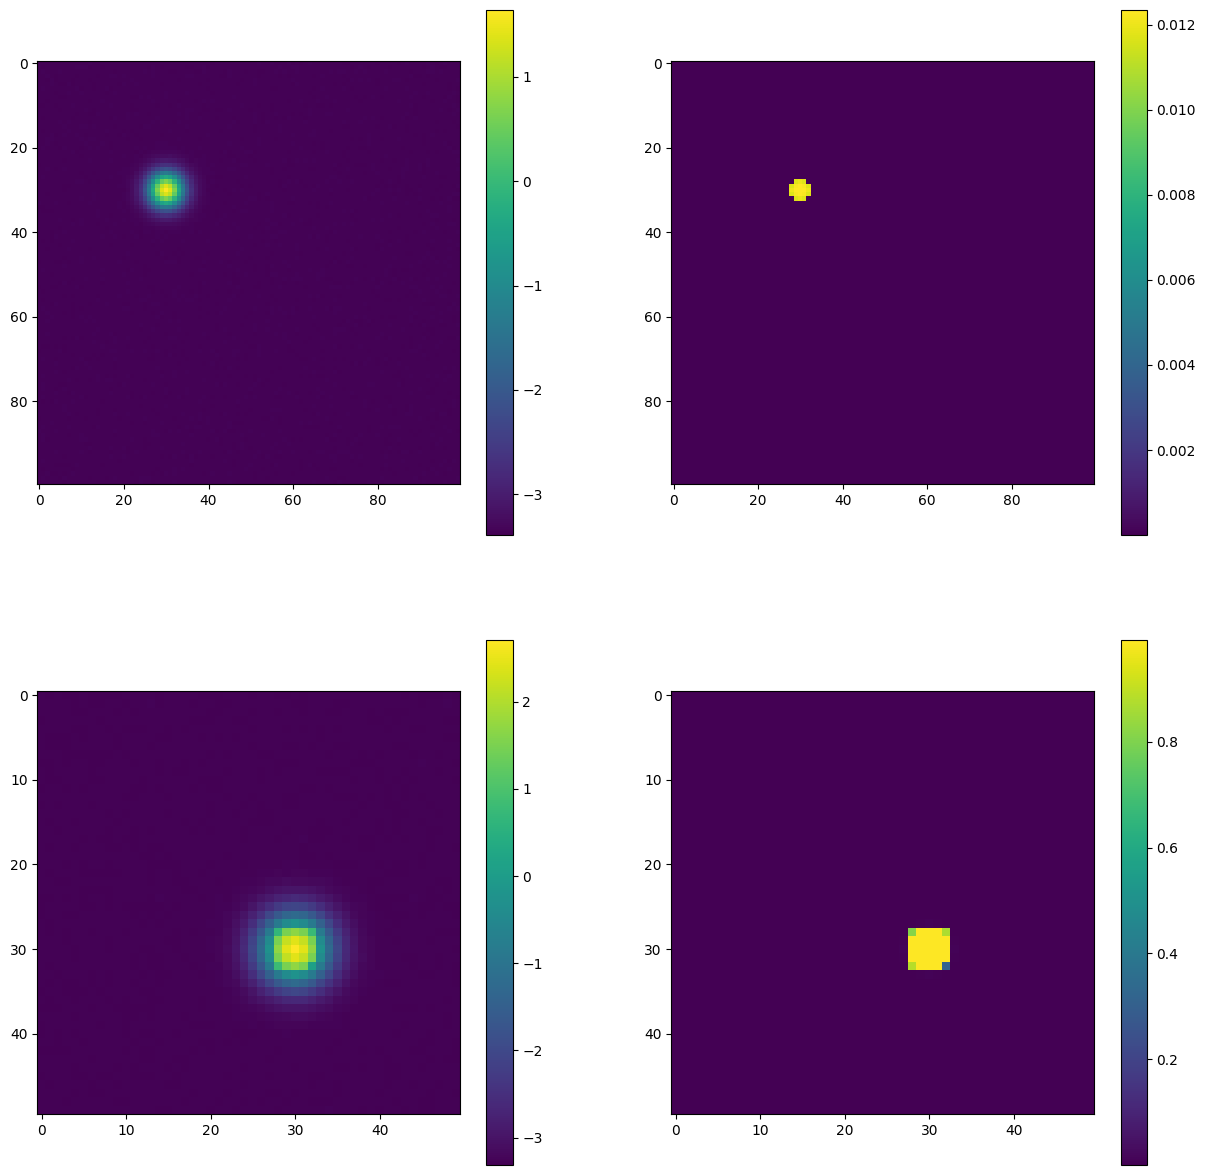

In [11]:
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, ["nf1.activation", "heb0.wheights", "nf2.activation", "heb1.wheights"], 30)


import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
im1=axes[0,0].imshow(plot_data_history[-1][0])
im2=axes[0,1].imshow(plot_data_history[-1][1][0])
im3=axes[1,0].imshow(plot_data_history[-1][2])
im4=axes[1,1].imshow(plot_data_history[-1][3][0])
fig.colorbar(im1, ax=axes[0,0])
fig.colorbar(im2, ax=axes[0,1])
fig.colorbar(im3, ax=axes[1,0])
fig.colorbar(im4, ax=axes[1,1])
plt.show()